In [1]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge ,Lasso
from sklearn.metrics import max_error ,mean_absolute_error ,mean_squared_error ,r2_score
from sklearn.model_selection import cross_val_score ,ShuffleSplit

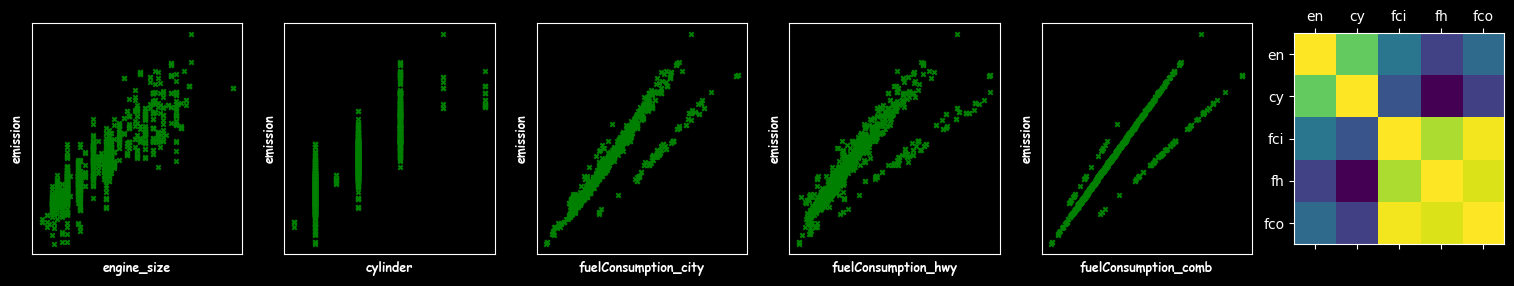

In [2]:
# prepration
fc_data =pd.read_csv('datasets/fuelConsumptionData.csv')
fc_informative_data =fc_data.select_dtypes(exclude=['object'])
x =fc_informative_data[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY' ,'FUELCONSUMPTION_HWY' ,'FUELCONSUMPTION_COMB']]
y =fc_informative_data['CO2EMISSIONS'] 
x_arr =x.to_numpy(np.float32)
y_arr =y.to_numpy(np.int32).reshape(-1,1)
x_norm =minmax_scale(x_arr ,feature_range=(0,1)) 
x_train ,x_test ,y_train ,y_test =train_test_split(x_norm ,y_arr ,test_size=0.2)
# plotting
plt.style.use('dark_background')
fig =plt.figure(num =1 ,figsize =(19,3) ,dpi =100)
# scatter_plot
ax1 =fig.add_subplot(1,6,1)
ax1.scatter(x_norm[: ,0] ,y ,c ='g' ,s =10 ,marker='x') 
plt.xticks([]);plt.yticks([])
plt.xlabel('engine_size' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
ax2 =fig.add_subplot(1,6,2)
ax2.scatter(x_norm[: ,1] ,y ,c ='g' ,s =10 ,marker='x') 
plt.xticks([]);plt.yticks([])
plt.xlabel('cylinder' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
ax3 =fig.add_subplot(1,6,3)
ax3.scatter(x_norm[: ,2] ,y ,c ='g' ,s =10 ,marker='x') 
plt.xticks([]);plt.yticks([])
plt.xlabel('fuelConsumption_city' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
ax4 =fig.add_subplot(1,6,4)
ax4.scatter(x_norm[: ,3] ,y ,c ='g' ,s =10 ,marker='x') 
plt.xticks([]);plt.yticks([])
plt.xlabel('fuelConsumption_hwy' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
ax5 =fig.add_subplot(1,6,5)
ax5.scatter(x_norm[: ,4] ,y ,c ='g' ,s =10 ,marker='x') 
plt.xticks([]);plt.yticks([])
plt.xlabel('fuelConsumption_comb' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
plt.ylabel('emission' ,{'size' :9 ,'weight' :'bold' ,'family' :'cursive'} ,5)
# corr_plot
ax6 =fig.add_subplot(1,6,6)
ax6.matshow(x.corr())
ax6.set_xticks(ticks =range(5) ,labels =['en' ,'cy' ,'fci' ,'fh' ,'fco'])
ax6.set_yticks(ticks =range(5) ,labels =['en' ,'cy' ,'fci' ,'fh' ,'fco'])
plt.show()

In [38]:
# details
# -------
def eva_scores(y_true ,y_pred) : 
    # max(yi,Yi) =max(|yi-Yi|)
    me =max_error(y_true =y_true ,y_pred =y_pred)
    # mae(yi,Yi) =1/n*Σ|yi-Yi|
    mae =mean_absolute_error(y_true =y_true ,y_pred =y_pred) 
    # mse(yi,Yi) =1/n*Σ(yi-Yi)^2
    mse =mean_squared_error(y_true =y_true ,y_pred =y_pred)
    # r2 =1 -(Σ(yi-Yi)^2/Σ(yi-Y)^2)
    r2 =r2_score(y_true =y_true ,y_pred =y_pred) 
    return { 
        'max_error' : me ,
        'mean_absolute_error' :mae ,
        'mean_squared_error' : mse , 
        'r2_score' : r2
    }

def cv_score(est) :
    cv =ShuffleSplit(n_splits =5 ,test_size =0.2)
    r2 =cross_val_score(est ,x_train ,y_train ,cv =cv ,scoring ='r2')
    r2_mean =np.mean(r2)
    return r2_mean


In [39]:
# ordinary_least_squares_model
# ----------------------------
ols =LinearRegression() 
# training
ols.fit(x_train ,y_train)
# prediction
Y_test_ols =ols.predict(x_test)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_ols),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ols),
    '\n')

 evaluation_scores : 
 {'max_error': 71.267333984375, 'mean_absolute_error': 17.29817164055655, 'mean_squared_error': 578.1020909551146, 'r2_score': 0.8518705368041992} 

 cv_score : 
 0.8683847665786744 



In [40]:
# ridge_regression_model
# ----------------------
ridge =Ridge(alpha=2)
# training 
ridge.fit(x_train ,y_train) 
# prediction
coefs =ridge.coef_
intercept =ridge.intercept_
Y_test_ridge =((x_test[:,0] *coefs[0 ,0]) + (x_test[:,1] *coefs[0 ,1]) + (x_test[:,2] *coefs[0 ,2]) + (x_test[:,3] *coefs[0 ,3]) + (x_test[:,4] *coefs[0 ,4]) + intercept).reshape(-1,1)
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_ridge),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ridge),
    '\n')

 evaluation_scores : 
 {'max_error': 71.35443115234375, 'mean_absolute_error': 17.301376556681696, 'mean_squared_error': 566.3959667336306, 'r2_score': 0.854870080947876} 

 cv_score : 
 0.8620146632194519 



In [41]:
# lasso_model
# -----------
lasso =Lasso(alpha=0.5) 
# training
lasso.fit(x_train ,y_train)
# prediction
Y_test_lasso =lasso.predict(x_test) 
# evaluation_scores
print(' evaluation_scores :',
    '\n',
    eva_scores(y_test,Y_test_lasso),
    '\n')
# cross_validation_score
print(' cv_score :',
    '\n',
    cv_score(ridge),
    '\n')

 evaluation_scores : 
 {'max_error': 68.3060302734375, 'mean_absolute_error': 17.58281194383853, 'mean_squared_error': 569.9023206731007, 'r2_score': 0.8539716005325317} 

 cv_score : 
 0.8591013073921203 

